# TensorFlow Classification

## Data

https://archive.ics.uci.edu/ml/datasets/pima+indians+diabetes

1. Title: Pima Indians Diabetes Database

2. Sources:
   (a) Original owners: National Institute of Diabetes and Digestive and
                        Kidney Diseases
   (b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu)
                          Research Center, RMI Group Leader
                          Applied Physics Laboratory
                          The Johns Hopkins University
                          Johns Hopkins Road
                          Laurel, MD 20707
                          (301) 953-6231
   (c) Date received: 9 May 1990

3. Past Usage:
    1. Smith,~J.~W., Everhart,~J.~E., Dickson,~W.~C., Knowler,~W.~C., \&
       Johannes,~R.~S. (1988). Using the ADAP learning algorithm to forecast
       the onset of diabetes mellitus.  In {\it Proceedings of the Symposium
       on Computer Applications and Medical Care} (pp. 261--265).  IEEE
       Computer Society Press.

       The diagnostic, binary-valued variable investigated is whether the
       patient shows signs of diabetes according to World Health Organization
       criteria (i.e., if the 2 hour post-load plasma glucose was at least 
       200 mg/dl at any survey  examination or if found during routine medical
       care).   The population lives near Phoenix, Arizona, USA.

       Results: Their ADAP algorithm makes a real-valued prediction between
       0 and 1.  This was transformed into a binary decision using a cutoff of 
       0.448.  Using 576 training instances, the sensitivity and specificity
       of their algorithm was 76% on the remaining 192 instances.

4. Relevant Information:
      Several constraints were placed on the selection of these instances from
      a larger database.  In particular, all patients here are females at
      least 21 years old of Pima Indian heritage.  ADAP is an adaptive learning
      routine that generates and executes digital analogs of perceptron-like
      devices.  It is a unique algorithm; see the paper for details.

5. Number of Instances: 768

6. Number of Attributes: 8 plus class 

    7. For Each Attribute: (all numeric-valued)
       1. Number of times pregnant
       2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
       3. Diastolic blood pressure (mm Hg)
       4. Triceps skin fold thickness (mm)
       5. 2-Hour serum insulin (mu U/ml)
       6. Body mass index (weight in kg/(height in m)^2)
       7. Diabetes pedigree function
       8. Age (years)
       9. Class variable (0 or 1)

8. Missing Attribute Values: Yes

9. Class Distribution: (class value 1 is interpreted as "tested positive for
   diabetes")

   Class Value  Number of instances
   0            500
   1            268

10. Brief statistical analysis:

        Attribute number:    Mean:   Standard Deviation:
        1.                     3.8     3.4
        2.                   120.9    32.0
        3.                    69.1    19.4
        4.                    20.5    16.0
        5.                    79.8   115.2
        6.                    32.0     7.9
        7.                     0.5     0.3
        8.                    33.2    11.8

In [1]:
import pandas as pd

In [2]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [4]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

### Clean the Data

In [15]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

#Intentionally left the 'Age' column because I want to bucketize it later ie. making it categorical variable.

In [16]:
#Normalization
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [17]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


### Feature Columns

In [18]:
diabetes.columns 

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [19]:
import tensorflow as tf

### Continuous Features

* Number of times pregnant
* Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* Diastolic blood pressure (mm Hg)
* Triceps skin fold thickness (mm)
* 2-Hour serum insulin (mu U/ml)
* Body mass index (weight in kg/(height in m)^2)
* Diabetes pedigree function

In [20]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

### Categorical Features

If you know the set of all possible values of a categorical column and there are only a few of them, you can use categorical_column_with_vocabulary_list. 

If you don't know the set of possible values of a categorical column in advance, you can use categorical_column_with_hash_bucket

In [21]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])
# Alternative
# assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10)

### Converting Continuous to Categorical

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

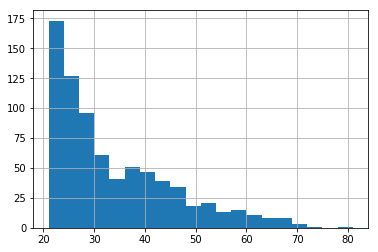

In [23]:
diabetes['Age'].hist(bins=20)

In [24]:
age_buckets = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

### Putting all the columns together

In [25]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,assigned_group, age_buckets]

### Train Test Split

In [26]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [27]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
Number_pregnant          768 non-null float64
Glucose_concentration    768 non-null float64
Blood_pressure           768 non-null float64
Triceps                  768 non-null float64
Insulin                  768 non-null float64
BMI                      768 non-null float64
Pedigree                 768 non-null float64
Age                      768 non-null int64
Class                    768 non-null int64
Group                    768 non-null object
dtypes: float64(7), int64(2), object(1)
memory usage: 60.1+ KB


In [28]:
x_data = diabetes.drop('Class',axis=1)

In [29]:
labels = diabetes['Class']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x_data,labels,test_size=0.33, random_state=101)

### Input Function

In [32]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

### Creating the Model

In [33]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\SHREEK~1.SAU\\AppData\\Local\\Temp\\tmpq2xuqsw5', '_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_experimental_distribute': None, '_master': '', '_save_checkpoints_steps': None, '_task_type': 'worker', '_device_fn': None, '_evaluation_master': '', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001F4F255DCC0>, '_keep_checkpoint_every_n_hours': 10000, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_is_chief': True, '_task_id': 0, '_save_summary_steps': 100, '_log_step_count_steps': 100, '_protocol': None, '_global_id_in_cluster': 0, '_keep_checkpoint_max': 5, '_tf_random_seed': None, '_service': None, '_train_distribute': None, '_num_worker_replicas': 1, '_eval_distribute': None}


In [34]:
model.train(input_fn=input_func,steps=1000)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\SHREEK~1.SAU\AppData\Local\Temp\tmpq2xuqsw5\model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 170.237
INFO:tensorflow:loss = 5.6536903, step = 101 (0.594 sec)
INFO:tensorflow:global_step/sec: 284.698
INFO:tensorflow:loss = 5.6229744, step = 201 (0.351 sec)
INFO:tensorflow:global_step/sec: 285.103
INFO:tensorflow:loss = 5.907465, step = 301 (0.353 sec)
INFO:tensorflow:global_step/sec: 307.473
INFO:tensorflow:loss = 4.90

## Evaluation

In [35]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      y=y_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [37]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-07-18:54:23
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\SHREEK~1.SAU\AppData\Local\Temp\tmpq2xuqsw5\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-10-07-18:54:24
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.71653545, accuracy_baseline = 0.65748036, auc = 0.78666806, auc_precision_recall = 0.62782466, average_loss = 0.53474164, global_step = 1000, label/mean = 0.34251967, loss = 5.2240143, precision = 0.5903614, prediction/mean = 0.37993658, recall = 0.5632184
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\SHREEK~1.SAU\AppData\Local\Temp\tmpq2xuqsw5\model.ckpt-1000


In [38]:
results

{'accuracy': 0.71653545,
 'accuracy_baseline': 0.65748036,
 'auc': 0.78666806,
 'auc_precision_recall': 0.62782466,
 'average_loss': 0.53474164,
 'global_step': 1000,
 'label/mean': 0.34251967,
 'loss': 5.2240143,
 'precision': 0.5903614,
 'prediction/mean': 0.37993658,
 'recall': 0.5632184}

## Predictions

In [39]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [40]:
# Predictions is a generator! 
predictions = model.predict(pred_input_func)

In [41]:
list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\SHREEK~1.SAU\AppData\Local\Temp\tmpq2xuqsw5\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.5331996], dtype=float32),
  'logits': array([0.13299417], dtype=float32),
  'probabilities': array([0.46680036, 0.5331996 ], dtype=float32)},
 {'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.6449052], dtype=float32),
  'logits': array([0.59671867], dtype=float32),
  'probabilities': array([0.35509476, 0.6449052 ], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.4005371], dtype=float32),
  'logits': array([-0.4032277], dtype=float32),
  'probabilities': array([0.59946287, 0.40053707], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.3184292], dtype=float32),
  'logits': array([-0.7609999], dtype=float32),
  'probabilities': array([0.68157077, 0.3184292 ], dtype=float32)},
 {'class_ids

# Dense Neural Network Classifier

In [43]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

#3 hidden layers with 10 neurons at each layer. 
#Dense connection means every neurons are connected to each other.

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\SHREEK~1.SAU\\AppData\\Local\\Temp\\tmpdeggixh1', '_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_experimental_distribute': None, '_master': '', '_save_checkpoints_steps': None, '_task_type': 'worker', '_device_fn': None, '_evaluation_master': '', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001F4F4028C50>, '_keep_checkpoint_every_n_hours': 10000, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_is_chief': True, '_task_id': 0, '_save_summary_steps': 100, '_log_step_count_steps': 100, '_protocol': None, '_global_id_in_cluster': 0, '_keep_checkpoint_max': 5, '_tf_random_seed': None, '_service': None, '_train_distribute': None, '_num_worker_replicas': 1, '_eval_distribute': None}


In [45]:
# Intentionally this error is introduced.
"""
Items of feature_columns must be a _DenseColumn. 
You can wrap a categorical column with an embedding_column or indicator_column.
It has been done in the next cell.
"""

dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.


ValueError: Items of feature_columns must be a _DenseColumn. You can wrap a categorical column with an embedding_column or indicator_column. Given: _VocabularyListCategoricalColumn(key='Group', vocabulary_list=('A', 'B', 'C', 'D'), dtype=tf.string, default_value=-1, num_oov_buckets=0)

In [46]:
embedded_group_column = tf.feature_column.embedding_column(assigned_group, dimension=4)

In [47]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,embedded_group_column, age_buckets]

In [48]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [49]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\SHREEK~1.SAU\\AppData\\Local\\Temp\\tmpcmcqo8bt', '_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_experimental_distribute': None, '_master': '', '_save_checkpoints_steps': None, '_task_type': 'worker', '_device_fn': None, '_evaluation_master': '', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001F4F5AB2780>, '_keep_checkpoint_every_n_hours': 10000, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_is_chief': True, '_task_id': 0, '_save_summary_steps': 100, '_log_step_count_steps': 100, '_protocol': None, '_global_id_in_cluster': 0, '_keep_checkpoint_max': 5, '_tf_random_seed': None, '_service': None, '_train_distribute': None, '_num_worker_replicas': 1, '_eval_distribute': None}


In [50]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\SHREEK~1.SAU\AppData\Local\Temp\tmpcmcqo8bt\model.ckpt.
INFO:tensorflow:loss = 6.729652, step = 1
INFO:tensorflow:global_step/sec: 214.836
INFO:tensorflow:loss = 6.2592506, step = 101 (0.474 sec)
INFO:tensorflow:global_step/sec: 323.271
INFO:tensorflow:loss = 3.5342026, step = 201 (0.305 sec)
INFO:tensorflow:global_step/sec: 327.56
INFO:tensorflow:loss = 6.05864, step = 301 (0.315 sec)
INFO:tensorflow:global_step/sec: 255.956
INFO:tensorflow:loss = 3.217113, step = 401 (0.380 sec)
INFO:tensorflow:global_step/sec: 263.21
INFO:tensorflow:loss = 6.8508162, step = 501 (0.383 sec)
INFO:tensorflow:global_step/sec: 232.14
INFO:tensorflow:loss = 4.2160053, step = 601 (0.435 sec)
INFO:tensorflow:global_step/

In [51]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      y=y_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [52]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-07-19:10:39
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\SHREEK~1.SAU\AppData\Local\Temp\tmpcmcqo8bt\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-10-07-19:10:40
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7401575, accuracy_baseline = 0.65748036, auc = 0.83271384, auc_precision_recall = 0.7047154, average_loss = 0.48460585, global_step = 1000, label/mean = 0.34251967, loss = 4.734226, precision = 0.60194176, prediction/mean = 0.3968889, recall = 0.7126437
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\SHREEK~1.SAU\AppData\Local\Temp\tmpcmcqo8bt\model.ckpt-1000


{'accuracy': 0.7401575,
 'accuracy_baseline': 0.65748036,
 'auc': 0.83271384,
 'auc_precision_recall': 0.7047154,
 'average_loss': 0.48460585,
 'global_step': 1000,
 'label/mean': 0.34251967,
 'loss': 4.734226,
 'precision': 0.60194176,
 'prediction/mean': 0.3968889,
 'recall': 0.7126437}